## Imports

In [93]:
from collections import namedtuple, defaultdict
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib as mpl
mpl.rcParams["figure.dpi"] = 300



Result = namedtuple('Result', ['partisans', "sims"])
Sim = namedtuple("Sim", ["asymptotic", "non_partisans_mean"])

In [94]:
PARTISAN_BIAS = 0.3
TRUE_BIAS = 0.6

## m = 3

In [115]:
#   1000 run/f but taking mean per sim 
#  import json
# Dwell = namedtuple("Dwell", ["n", "mean", "stdev"])
# # results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


# with open("output/bigexperiment-2023_02_23-00_39_03.log", 'r') as f:
#     max_distances = max(len(json.loads(line)['d']) for line in f)
#     results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

# rows = []
# with open("output/bigexperiment-2023_02_23-00_39_03.log", 'r') as f:
#     for line in f:
#         d = json.loads(line)

#         for dist, (n, mean, stdev) in enumerate(d['d']):
#             rows.append(dict(partisans= d['p'], dist= dist, n= n, mean= mean, stdev= stdev))
#             results_by_partisan[d['p']][dist].append(Dwell(n, mean, stdev))

# df = pd.DataFrame(rows)

In [185]:
import json
Dwell = namedtuple("Dwell", ["n", "d"])
# results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


with open("output/bigexperiment-2023_03_23-20_56_15.log", 'r') as f:
    max_distances = max(len(json.loads(line)['d']) for line in f)
    results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

rows = []
with open("output/bigexperiment-2023_03_23-20_56_15.log", 'r') as f:
    for line in f:
        data = json.loads(line)
        for dist, (n, d) in enumerate(data['d']):
            for dwell in d:
                rows.append(dict(partisans= data['p'], dist= dist, n= n, d= dwell))

        #     rows.append(dict(partisans= data['p'], dist= dist, n= n, d=d))
        #     results_by_partisan[data['p']][dist].append(Dwell(n, d))

df = pd.DataFrame(rows)

In [186]:
df.groupby('partisans')

In [187]:
df[df.dist == 0].head(20)

,partisans,dist,n,d
0,0.01,0,1,10000
59084,0.01,0,1,10000
105755,0.01,0,1,10000
160664,0.01,0,1,10000
215853,0.01,0,1,10000
270959,0.01,0,1,10000
324303,0.01,0,1,10000
380595,0.01,0,1,10000
433955,0.01,0,1,10000
486206,0.01,0,1,10000


In [188]:
def find_min_max(x):
    return min(x), max(x) 

In [189]:
# df.groupby(["partisans", 'dist']).sum().n.reset_index()

In [190]:
df_dist_1 = df[df.dist == 1]
df_dist_2 = df[df.dist == 2]
df_dist_3 = df[df.dist == 3]
df_dist_4 = df[df.dist == 4]


In [191]:
df_dist_2[df_dist_2.partisans == 0.05].describe()

,partisans,dist,n,d
count,9.620360e+05,962036.0,962036.000000,962036.000000
mean,5.000000e-02,2.0,41.928466,2.669980
std,1.040835e-16,0.0,5.076216,2.828371
min,5.000000e-02,2.0,28.000000,1.000000
25%,5.000000e-02,2.0,39.000000,1.000000
50%,5.000000e-02,2.0,43.000000,2.000000
75%,5.000000e-02,2.0,46.000000,3.000000
max,5.000000e-02,2.0,52.000000,147.000000


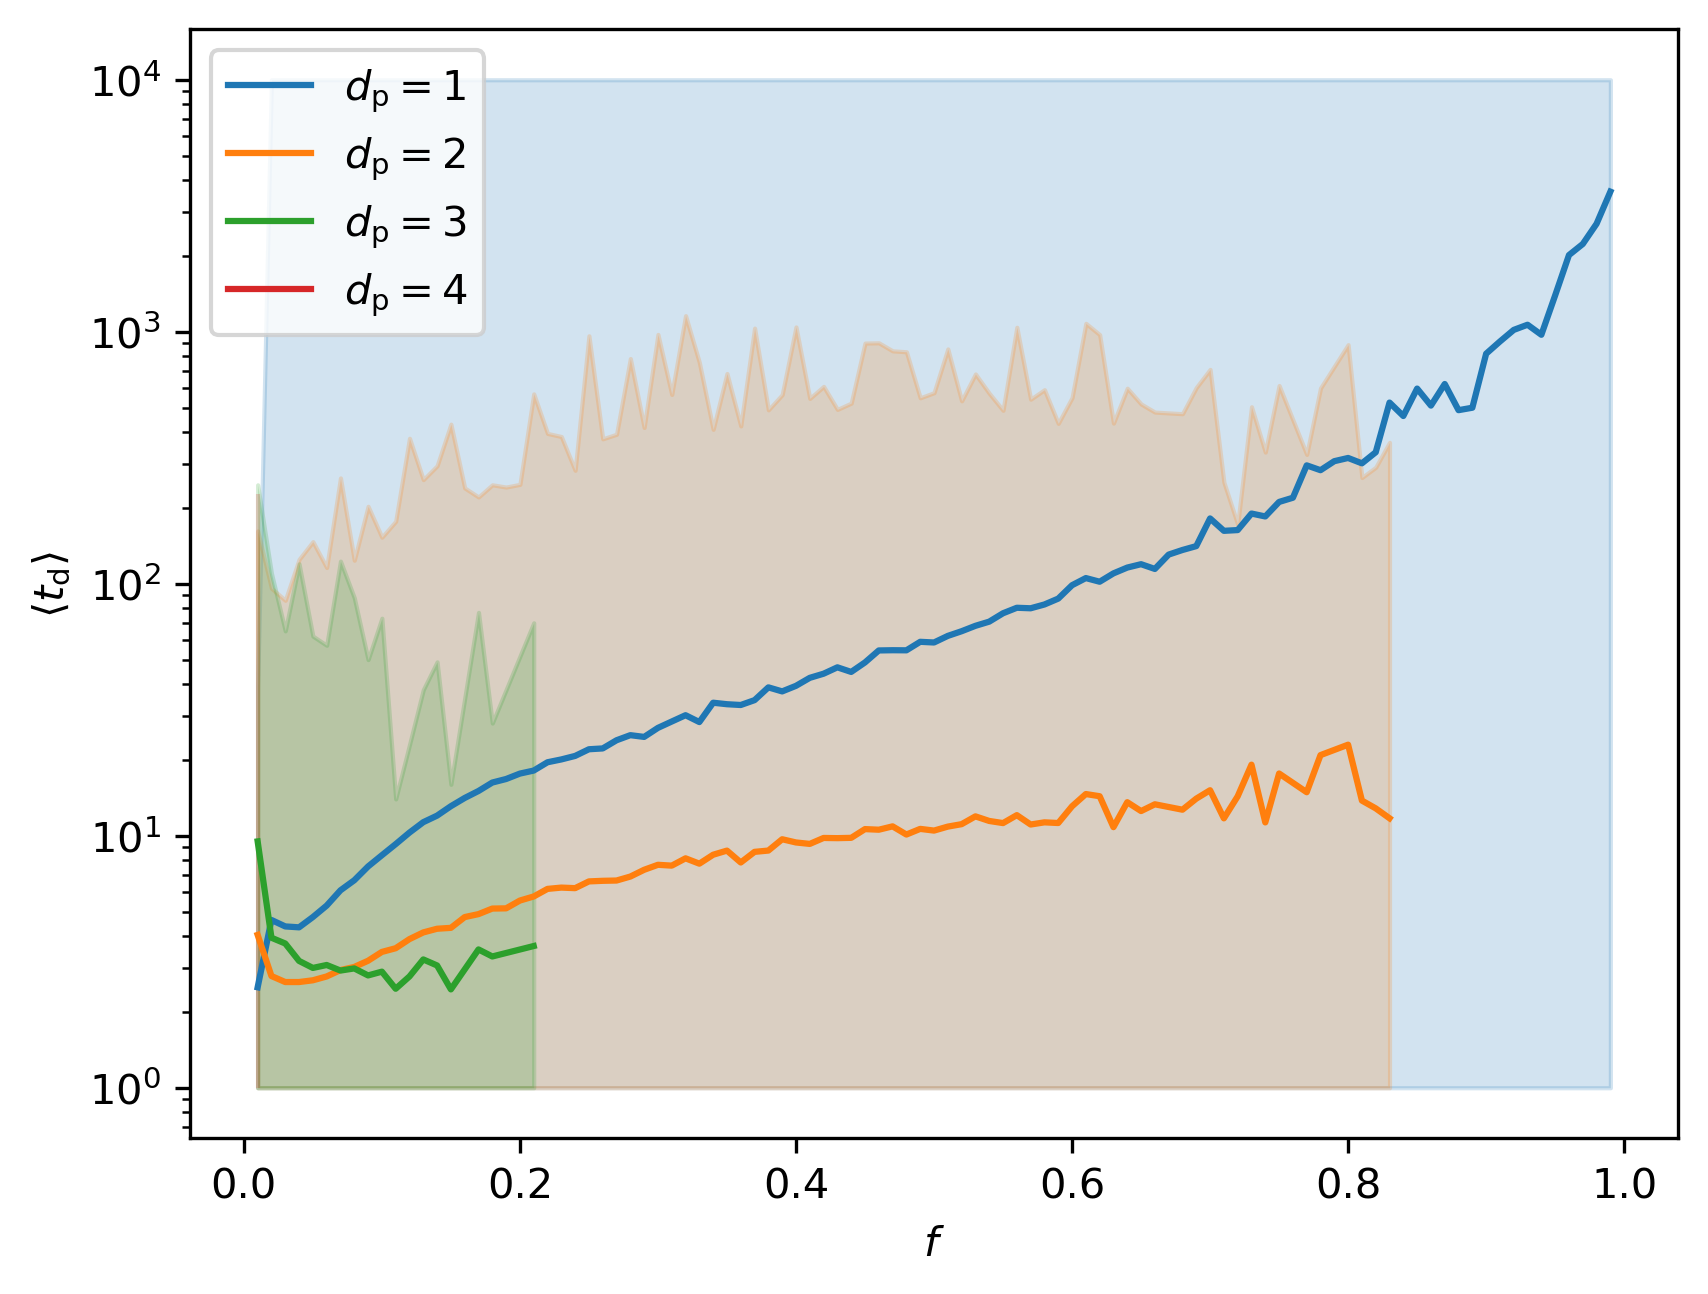

In [192]:
sns.lineplot(df_dist_1, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 1$")
sns.lineplot(df_dist_2, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 2$")
sns.lineplot(df_dist_3, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 3$")
sns.lineplot(df_dist_4, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 4$")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")



(0.01, 0.1)

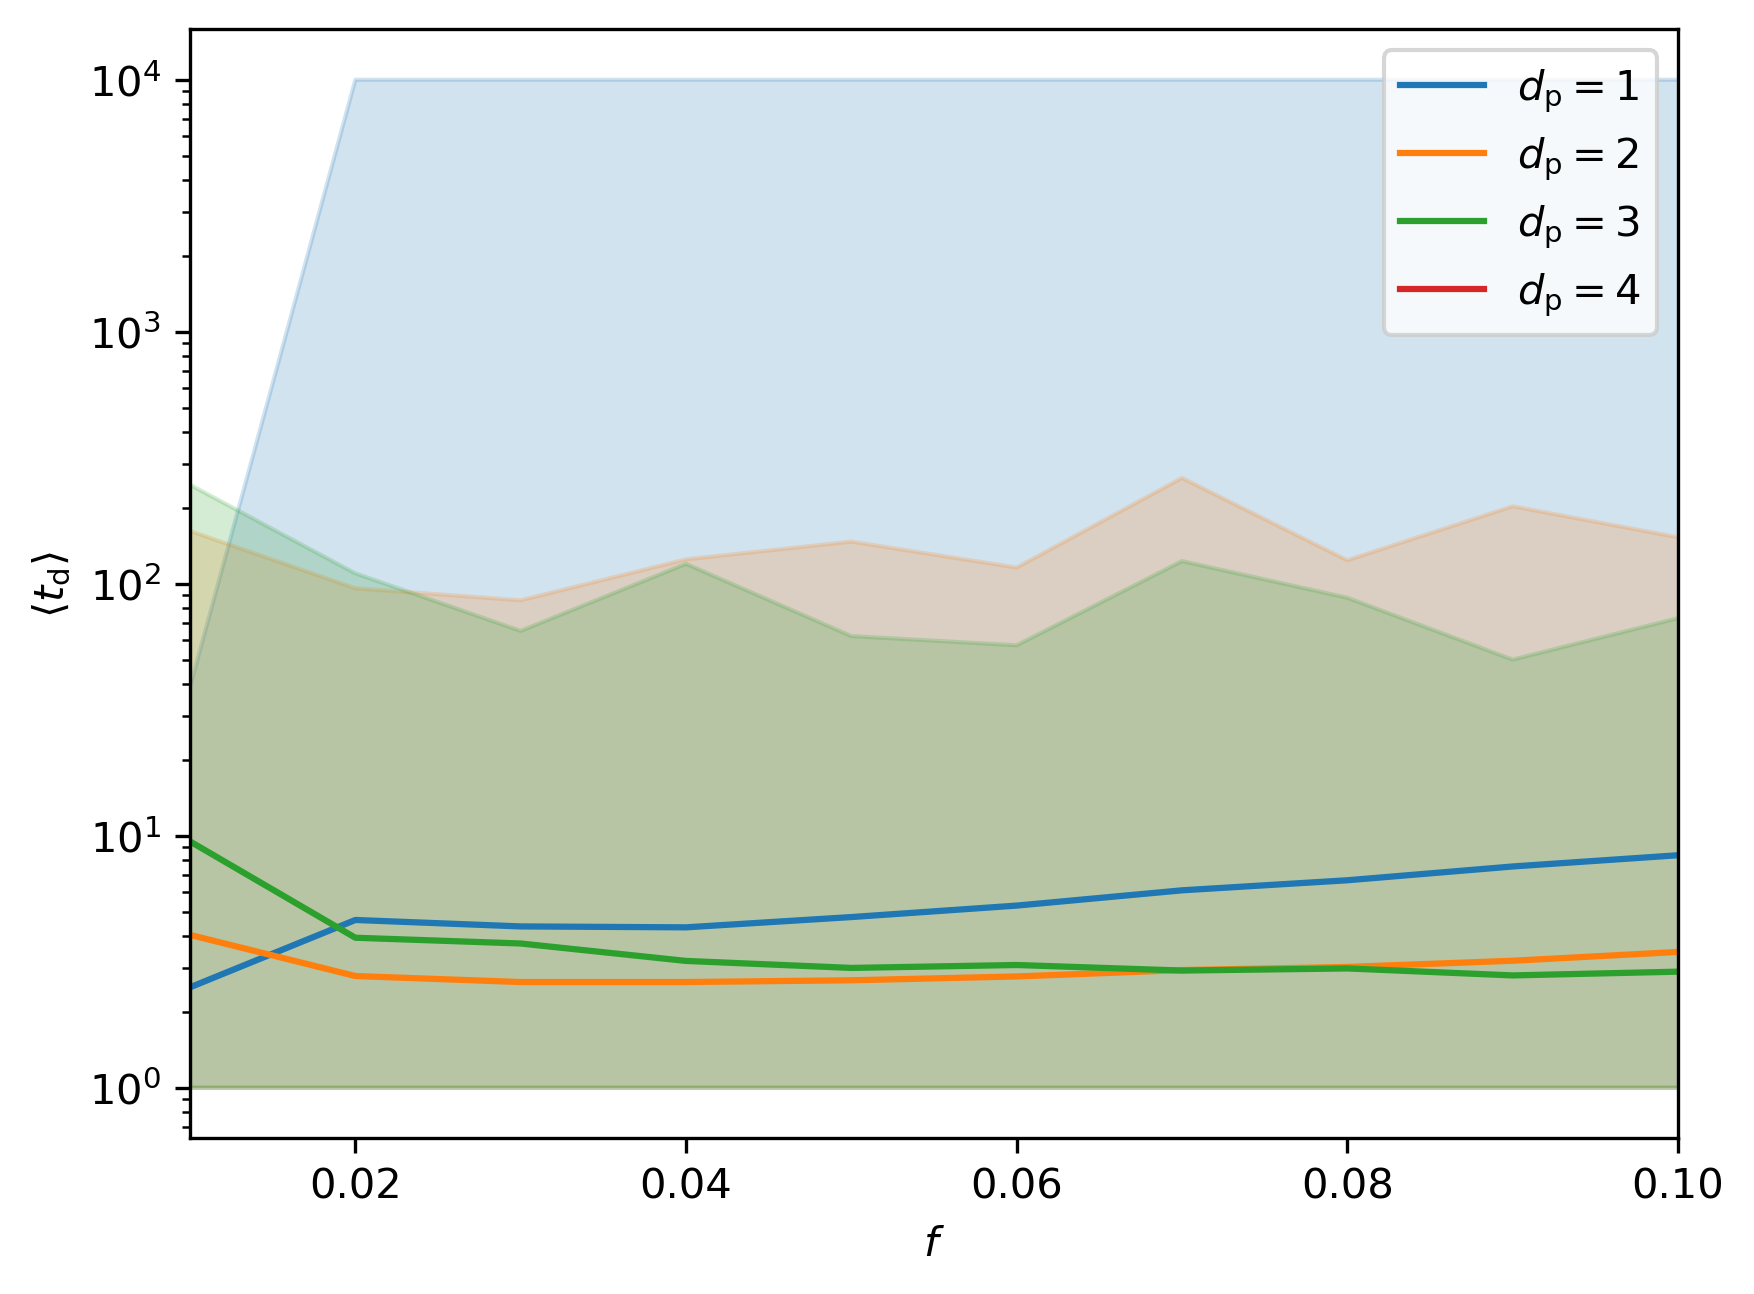

In [193]:
sns.lineplot(df_dist_1, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 1$")
sns.lineplot(df_dist_2, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 2$")
sns.lineplot(df_dist_3, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 3$")
sns.lineplot(df_dist_4, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 4$")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")

plt.xlim(0.01, 0.1)

# m = 20

In [44]:
# import json
# Dwell = namedtuple("Dwell", ["n", "mean", "stdev"])
# # results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


# with open("output/bigexperiment-2023_02_25-20_46_34.log", 'r') as f:
#     max_distances = max(len(json.loads(line)['d']) for line in f)
#     results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

# rows = []
# with open("output/bigexperiment-2023_02_25-20_46_34.log", 'r') as f:
#     for line in f:
#         d = json.loads(line)

#         for dist, (n, mean, stdev) in enumerate(d['d']):
#             rows.append(dict(partisans= d['p'], dist= dist, n= n, mean= mean, stdev= stdev))
#             results_by_partisan[d['p']][dist].append(Dwell(n, mean, stdev))

# df = pd.DataFrame(rows)

In [194]:
import json
Dwell = namedtuple("Dwell", ["n", "d"])
# results_by_partisan[0.01] = [ aggdwells dist 0,  aggdwells dist 1, ... ]


with open("output/bigexperiment-2023_03_24-00_32_18.log", 'r') as f:
    max_distances = max(len(json.loads(line)['d']) for line in f)
    results_by_partisan = defaultdict(lambda: [[] for x in range(max_distances)])

rows = []
with open("output/bigexperiment-2023_03_24-00_32_18.log", 'r') as f:
    for line in f:
        data = json.loads(line)
        for dist, (n, d) in enumerate(data['d']):
            for dwell in d:
                rows.append(dict(partisans= data['p'], dist= dist, n= n, d= dwell))

        #     rows.append(dict(partisans= data['p'], dist= dist, n= n, d=d))
        #     results_by_partisan[data['p']][dist].append(Dwell(n, d))

df = pd.DataFrame(rows)

In [195]:
df.groupby('partisans')

In [196]:
df_dist_1 = df[df.dist == 1]
df_dist_2 = df[df.dist == 2]
df_dist_3 = df[df.dist == 3]
df_dist_4 = df[df.dist == 4]

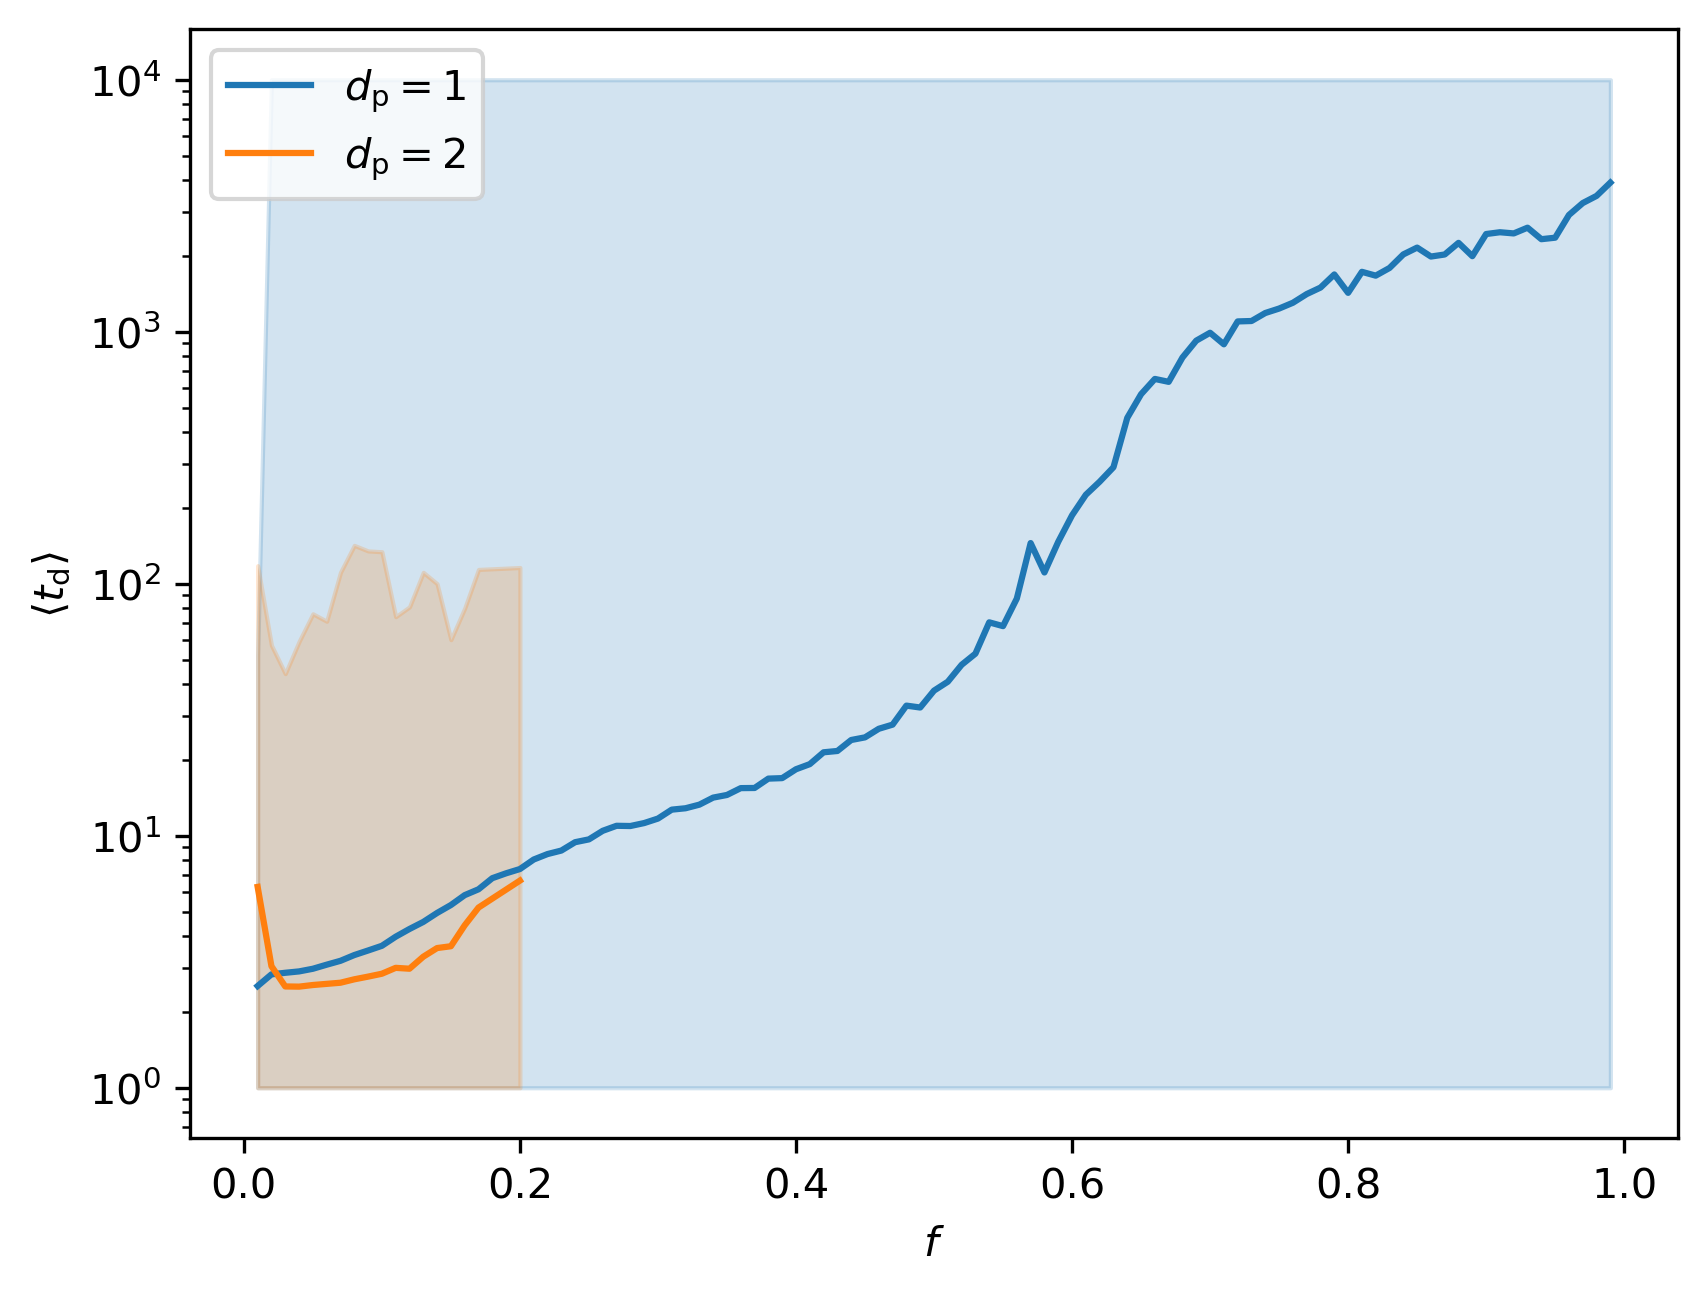

: 

In [198]:
sns.lineplot(df_dist_1, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 1$")
sns.lineplot(df_dist_2, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 2$")
sns.lineplot(df_dist_3, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 3$")
sns.lineplot(df_dist_4, x="partisans", y="d", errorbar= find_min_max, label="$d_{\\rm p} = 4$")
plt.legend()
plt.xlabel("$f$")
plt.ylabel("$\\langle t_{\\rm d} \\rangle$")
plt.yscale("log")
# plt.xscale("log")

# plt.xlim(0.02)

In [ ]:
df["dist"].value_counts()


0    99000
1    99000
2     9820
Name: dist, dtype: int64